In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.integrate import solve_ivp

In [2]:
def flow(alpha, x, y):
    u = alpha * x + alpha * y
    v = -0.25 * x
    return u,v

In [3]:
def euler(alpha, delta, y):
    u,v= flow(alpha, y[0], y[1])
    return y + delta * np.asarray([u, v])

In [4]:
def plot_face_portrait(alpha, index, grid):
    Y, X = np.mgrid[1:-1:20j, 1:-1:20j]
    U,V = flow(alpha, X, Y)
    trajectory = []
    y = [1, 0.25]
    for i in range(10000):
        trajectory.append(y)
        y = euler(alpha, -0.01, y)
    trajectory = np.asarray(trajectory).T
    ax = plt.subplot(grid[index, 0])
    ax.streamplot(X, Y, U, V, density=[0.5, 1])
    ax.plot(trajectory[0], trajectory[1])
    ax.set_title('Alpha: ' + str(alpha))
    return

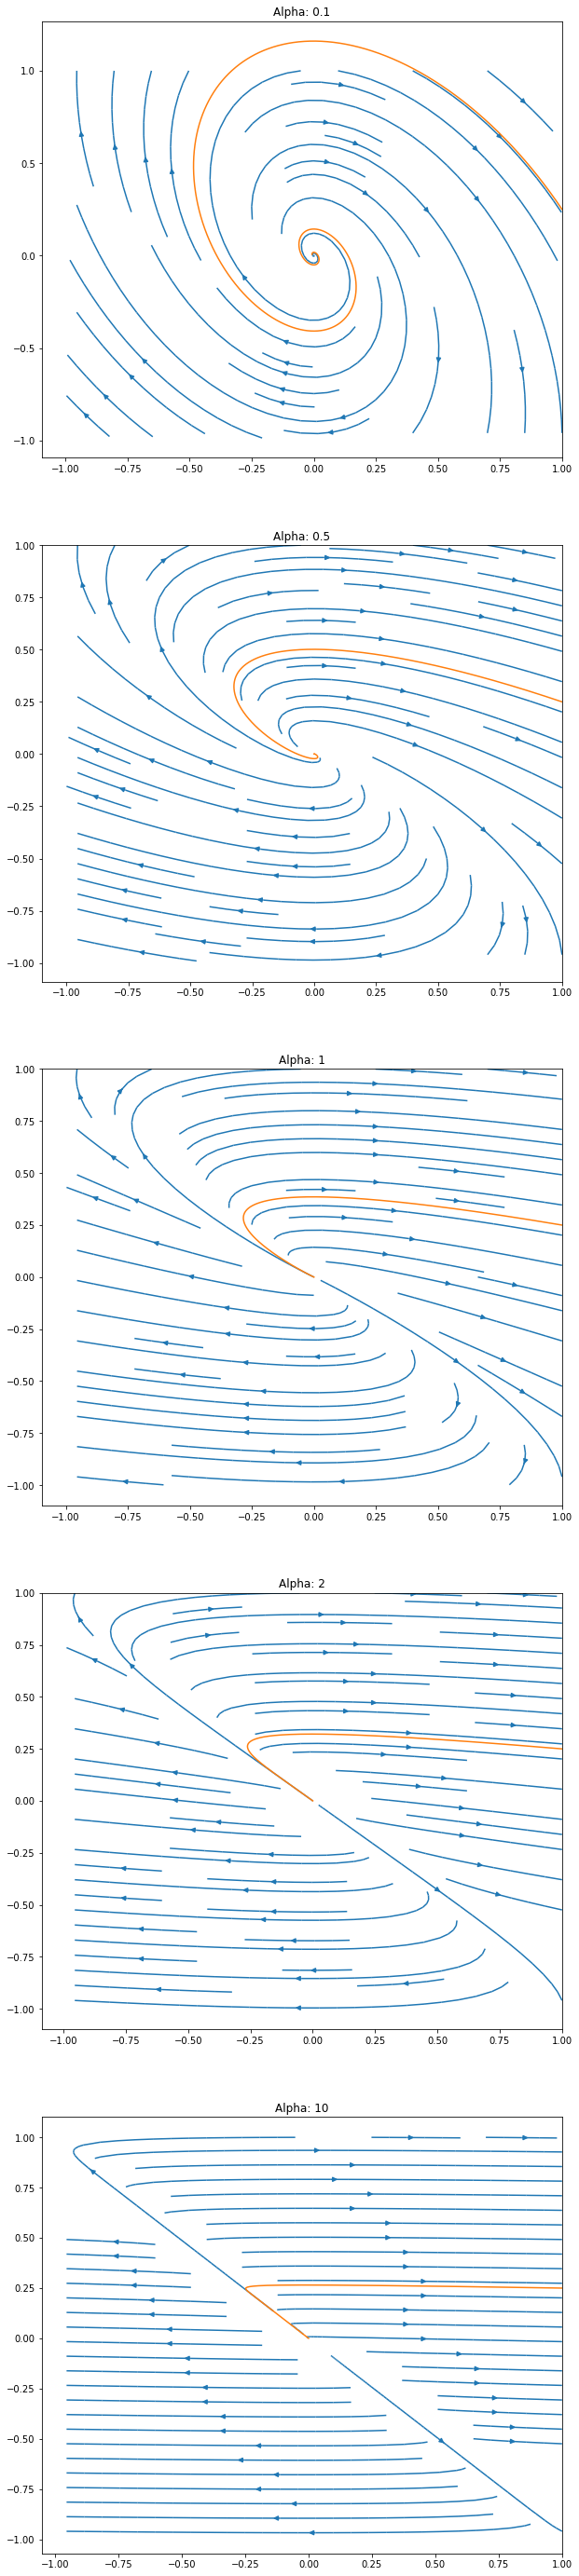

In [5]:
alphas = [0.1, 0.5, 1, 2, 10]

fig = plt.figure(figsize=(10, 50))
gs = gridspec.GridSpec(nrows=5, ncols=1)

for i in range(len(alphas)):
    plot_face_portrait(alphas[i], i, gs)
    